In [2]:
from torch_geometric.data import Data
from torch_geometric.datasets import TUDataset
import pandas as pd
import torch
import os

dataset = TUDataset(root='', name='NCI-H23')

Extracting ./NCI-H23/NCI-H23.zip
Processing...
Done!


In [3]:
# node features mapping
symbol_to_number = {
    "O": 0,
    "N": 1,
    "C": 2,
    "S": 3,
    "Cl": 4,
    "P": 5,
    "F": 6,
    "Na": 7,
    "Sn": 8,
    "Pt": 9,
    "Ni": 10,
    "Zn": 11,
    "Mn": 12,
    "Br": 13,
    "Cu": 14,
    "Co": 15,
    "Se": 16,
    "Au": 17,
    "Pb": 18,
    "Ge": 19,
    "I": 20,
    "Si": 21,
    "Fe": 22,
    "Cr": 23,
    "Hg": 24,
    "As": 25,
    "B": 26,
    "Ga": 27,
    "Ti": 28,
    "Bi": 29,
    "Y": 30,
    "Nd": 31,
    "Eu": 32,
    "Tl": 33,
    "Zr": 34,
    "Hf": 35,
    "In": 36,
    "K": 37,
    "La": 38,
    "Ce": 39,
    "Sm": 40,
    "Gd": 41,
    "Dy": 42,
    "U": 43,
    "Pd": 44,
    "Ir": 45,
    "Re": 46,
    "Li": 47,
    "Sb": 48,
    "W": 49,
    "Mg": 50,
    "Ru": 51,
    "Rh": 52,
    "Os": 53,
    "Th": 54,
    "Mo": 55,
    "Nb": 56,
    "Ta": 57,
    "Ag": 58,
    "Cd": 59,
    "Er": 60,
    "V": 61,
    "Ac": 62,
    "Te": 63,
    "Al": 64,
}
number_to_symbol = {v: k for k, v in symbol_to_number.items()}

In [4]:
# edge features mapping
array_to_number = {
    0 : 1,
    1 : 2,
    2 : 3,
}

In [5]:
print(array_to_number.keys())

dict_keys([0, 1, 2])


In [6]:
data_list = []
# select 100 positive graphs and 100 negative graphs
positive_count = 0
negative_count = 0
for i in range(len(dataset)):
    data = dataset[i]
    if data.y.item() == 1:
        if positive_count < 100:
            positive_count += 1
            data_list.append(data)
    else:
        if negative_count < 100:
            negative_count += 1
            data_list.append(data)
    if positive_count == 100 and negative_count == 100:
        break


In [7]:
# convert the graph to relational data tables

kb = {}
kb["molecule"] = pd.DataFrame(columns=["id","class"])
kb["atom"] = pd.DataFrame(columns=["id","atom_id","atom_type"])
kb["bond"] = pd.DataFrame(columns=["id","atom1","atom2","bond_type"])
molecule = {"id": [], "class": []}
atom = {"id": [], "atom_id": [], "atom_type": []}
bond = {"id": [], "atom1": [], "atom2": [], "bond_type": []}

for i, graph in enumerate(data_list):
    # add molecule
    molecule["id"].append(i)
    label = "pos" if graph.y.item() == 1 else "neg"
    molecule["class"].append(label)
    # add atoms
    for j, atm in enumerate(graph.x):
        atom["id"].append(i)
        atom["atom_id"].append(j)
        atom_type = number_to_symbol[torch.nonzero(atm).item()]
        atom["atom_type"].append(atom_type)
    # add bonds
    for j, bnd in enumerate(graph.edge_index.t()):
        bond["id"].append(i)
        bond["atom1"].append(bnd[0].item())
        bond["atom2"].append(bnd[1].item())
        bond_type = array_to_number[torch.nonzero(graph.edge_attr[j]).item()]
        bond["bond_type"].append(bond_type)

kb["molecule"] = pd.DataFrame(molecule)
kb["atom"] = pd.DataFrame(atom)
kb["bond"] = pd.DataFrame(bond)
# save the relational data tables
for table_name, table in kb.items():
    table.to_csv(os.path.join("..","..","docker","Benchmark","nci","relational",f"{table_name}.csv"), index=False)

In [8]:
print("Length of dataset: ", len(dataset))
print("Number of classes: ", dataset.num_classes)
print("Number of node features: ", dataset.num_node_features)
print("Number of edge features: ", dataset.num_edge_features)
print("Amount of positive samples: ", len([graph for graph in dataset if graph.y.item() == 1]))
print("Amount of negative samples: ", len([graph for graph in dataset if graph.y.item() == 0]))

Length of dataset:  40353
Number of classes:  2
Number of node features:  65
Number of edge features:  3
Amount of positive samples:  2057
Amount of negative samples:  38296


In [9]:
total_nodes = 0
total_edges = 0
for graph in dataset:
    total_nodes += graph.num_nodes
    total_edges += graph.num_edges

print("Average number of nodes: ", total_nodes / len(dataset))
print("Average number of edges: ", total_edges / len(dataset))

Average number of nodes:  26.07270834882165
Average number of edges:  56.200877258196414


In [10]:
print(dataset[0].edge_index)

tensor([[  0,   1,   2,   3,   4,   4,   5,   6,   7,   8,   8,   9,  10,  11,
          12,  13,  14,  15,  16,  17,  17,  18,  18,  19,  19,  19,  20,  20,
          20,  21,  21,  21,  22,  22,  22,  23,  23,  24,  24,  24,  25,  25,
          26,  26,  26,  27,  27,  28,  28,  29,  29,  30,  30,  31,  31,  31,
          32,  32,  32,  33,  33,  33,  34,  34,  34,  35,  35,  35,  36,  36,
          36,  37,  37,  38,  38,  39,  39,  39,  40,  40,  40,  41,  41,  41,
          42,  42,  42,  43,  43,  44,  44,  44,  45,  45,  45,  46,  47,  47,
          47,  48,  48,  48,  49,  50,  50,  50,  51,  51,  51,  52,  52,  52,
          53,  53,  53,  54,  54,  54,  55,  55,  55,  56,  56,  56,  57,  57,
          58,  59,  60,  61,  61,  62,  62,  63,  63,  64,  64,  64,  65,  65,
          65,  66,  66,  66,  67,  67,  67,  68,  68,  69,  69,  69,  70,  71,
          71,  72,  72,  72,  73,  73,  73,  74,  74,  75,  75,  76,  76,  76,
          77,  77,  77,  78,  78,  79,  79,  80,  80

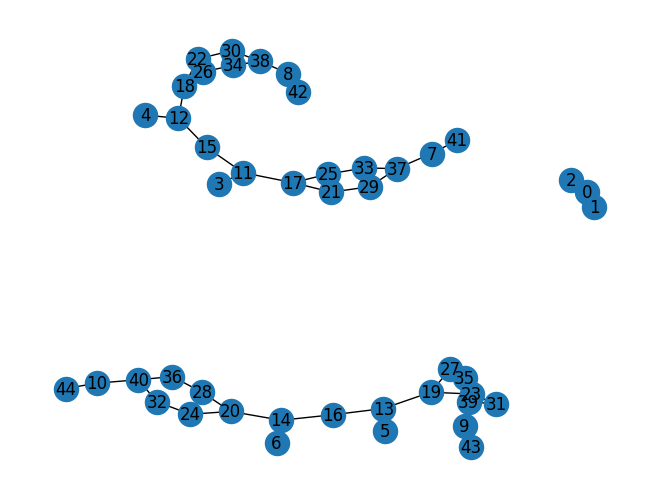

Graph label:  0


In [25]:
# plot a graph using networkx
import networkx as nx
import matplotlib.pyplot as plt

pos_graphs = [graph for graph in dataset if graph.y.item() == 1]
neg_graphs = [graph for graph in dataset if graph.y.item() == 0]

graph = neg_graphs[3]
G = nx.Graph()
G.add_nodes_from(range(graph.num_nodes))
edges = graph.edge_index.t().tolist()
G.add_edges_from(edges)

plt.figure()
nx.draw(G, with_labels=True,pos=nx.spring_layout(G))
plt.show()
print("Graph label: ", graph.y.item())